# EDA for G2M insight for Cab Investment firm

In [933]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

### Reading the contents of a CSV files and checking them

In [934]:
transaction_id = pd.read_csv('Transaction_ID.csv')
customer_id = pd.read_csv('Customer_ID.csv')
city_data = pd.read_csv('City.csv')
cab_data = pd.read_csv('Cab_Data.csv')

In [935]:
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [936]:
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [937]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [938]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


### Working with the data

##### Transforming data to an usefull type

In [939]:
city_data['Population'] = city_data['Population'].str.replace(',', '').astype(int)
city_data['Users'] = city_data['Users'].str.replace(',', '').astype(int)

In [940]:
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], origin='2016-01-01', unit='D')
cab_data = cab_data.astype({'Company': 'string', 'City': 'string'})

##### Merging all related data to create one master data.

In [941]:
transaction_cab_merged = pd.merge(transaction_id, cab_data, on='Transaction ID', how='inner')

In [942]:
master_data = pd.merge(transaction_cab_merged, customer_id, on='Customer ID', how='inner')

In [943]:
master_data.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,2132-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813
1,10351127,29290,Cash,2134-07-23,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813
2,10412921,29290,Card,2134-11-25,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813
3,10000012,27703,Card,2132-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237
4,10320494,27703,Card,2134-04-23,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237


### First Analysis - Which cities are good opportunities?

Text(0.5, 1.0, 'Cab Users by City')

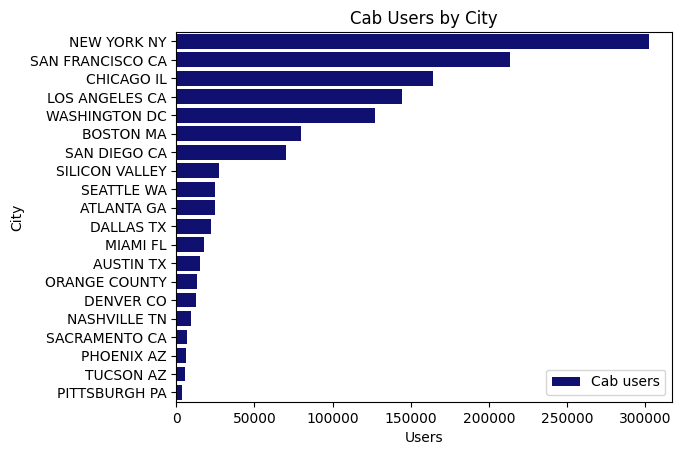

In [944]:
sorted_city_data = city_data.sort_values('Users', ascending=False)
sns.barplot(data=sorted_city_data, x='Users', y='City', label='Cab users', color='navy').set_title('Cab users by city')

[Text(0.5, 0, 'Users'),
 Text(0, 0.5, 'City'),
 Text(0.5, 1.0, 'User count for each company by city')]

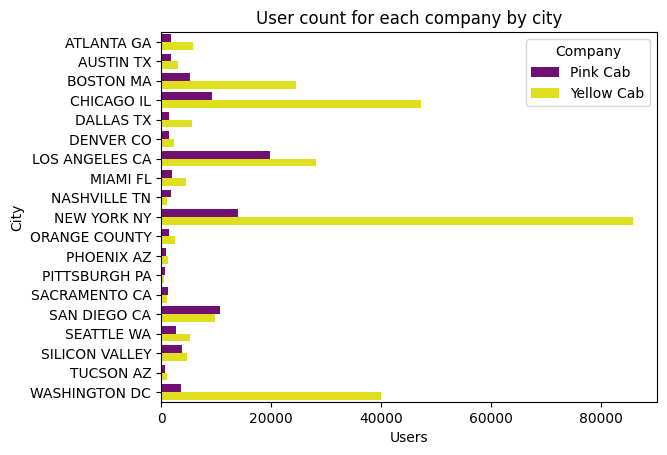

In [961]:
company_city = sns.countplot(data=master_data, y='City', hue='Company', palette=['purple', 'yellow'])
company_city.set(xlabel='Users', ylabel='City', title='User count for each company by city')

### Second Analysis - Which company earned more?